___
<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg" width="350px" height="180px" />


# <font color= 'maroon'> Proyecto Laboratorio de Modelado de Datos </font>
- <Strong> `Paula Daniela Cárdenas Gallardo` </Strong>
- <Strong> Expediente </Strong>: $733720$
- <Strong> Año </Strong>: $2021$
- <Strong> Email: </Strong>  <font color="blue"> `paula.cardenas@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: http://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg.</p>

## <font color= 'darkblue'> Introducción </font>

A lo largo de este trabajo se realizarán varios modelos matemáticos para predecir datos, a través del aprendizaje supervisado, respecto a un conjunto de datos. Dicho trabajo se dividirá en dos problemas; uno de regresión y otro de clasificación, cada uno con su respectivo conjunto de datos. Ambos *datasets* se consiguieron del repertorio `UCI` [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/index.php), las ligas de cada uno se especificarán posteriormente. 

Para llevar a cabo los procedimientos, se necesitan importar algunas librerías, así como especificar la ruta donde se encuentra el archivo descargado de cada base de datos. Más adelante se dan mayores detalles y requerimientos. Además, antes de los modelos mencionados, primero se hará un análisis y preprocesamiento de datos para identificar el tamaño de los datos, el significado de cada variable, si hay datos nulos, atípicos, entre otras cosas. Posterior a ello, se procederá a realizar tres distintos modelos para regresión y tres diferentes modelos para clasificación, mismos que se compararán para sacar conclusiones pertinentes.

Mediante este reporte, se irá explicando lo que se realiza junto con el código utilizado para lograrlo. En caso de desear utilizar estos datos para aplicaciones reales o para la industria, se recomienda comparar más modelos; redes neuronales, xgboost, regresiones, etc. y sus respectivas optimizaciones de hiperparámetros. Este trabajo tiene fines académicos.

## <font color= 'darkblue'> Desarrollo </font>

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### <font color= 'blue'> Regresión </font> 
<font color= 'teal'> 1. **Definición del problema**. </font>

La base de datos con la que se trabajará analiza la energía utilizada en $12$ diferentes construcciones simuladas en la empresa *Ecotect*. Las construcciones difieren respecto al área de acristalamiento (proceso que genera hojas de vidrio u otro material transparente realizadas para ser colocadas en marcos como puertas, ventanas, espejos, etc.), su distribución, orientación, entre otros parámetros. Se simulan varios aspectos de las características mencionadas para obtener $768$ construcciones. El conjunto de datos presenta las $768$ muestras y $8$ características, también llamadas variables o *features*, con el objetivo de predecir dos variables; los requisitos de carga de calefacción y carga de refrigeración de los edificios. Los datos se obtuvieron de [archive.ics.uci.edu](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#).

**Variables:**
+ $X_1$ $\rightarrow$ Relative Compactness
+ $X_2$ $\rightarrow$ Surface Area
+ $X_3$ $\rightarrow$ Wall Area
+ $X_4$ $\rightarrow$ Roof Area
+ $X_5$ $\rightarrow$ Overall Height
+ $X_6$ $\rightarrow$ Orientation
+ $X_7$ $\rightarrow$ Glazing Area
+ $X_8$ $\rightarrow$ Glazing Area Distribution
+ $y_1$ $\rightarrow$ Heating Load
+ $y_2$ $\rightarrow$ Cooling Load

Para poder visualizar los datos a través del código posterior, es importante tener el archivo tipo `csv` (adjunto) en el mismo entorno virtual que este *Jupyter Notebook*, en caso contrario será necesario especificar la dirección en donde se encuentra dicho documento. Si se prefiere, los datos pueden ser descargados directamente desde la página mencionada ([archive.ics.uci.edu](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#)) pero deberá cambiarse el código por `pd.read_excel()` en lugar de `pd.read_csv`, ya que se descarga como un archivo de MS Excel (`xslx`).

<font color= 'teal'> 2. **Preparación de datos**. </font> <br>

In [2]:
# Importar datos
data = pd.read_csv('Energy_Efficiency.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Debido al objetivo de este proyecto, únicamente se predecirá una variable. En este caso, será $y_1$, la cual representa la carga de calefacción necesaria de los edificios.

In [3]:
# Eliminar la columna que no se utilizará
data.drop('Y2', axis= 1, inplace= True)

In [4]:
# Renombrar las columnas para saber cuál es cada una
nombres= ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area',
'glazing_area_distribution', 'heating_load']
data.columns= nombres
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [5]:
# Conocer los datos

# Se guardan los datos como un DataFrame de pandas
print(f'+ Tipo: \n {type(data)}')

# El tamaño de los datos se visualiza en una tupla; primero la cantidad de filas y después el número de columnas
print(f'\n+ Dimensión de los datos: \n {data.shape}')

# Tipo de cada variable
print(f'\n+ Tipo de datos por columna: \n{data.dtypes}')

# Conteo de valores nulos
print(f'\n+ Cantidad de nulos por columna: \n{data.isnull().sum()}')

# Valores únicos
print(f'\n+ Valores únicos por columna: \n{data.nunique()}')

+ Tipo: 
 <class 'pandas.core.frame.DataFrame'>

+ Dimensión de los datos: 
 (768, 9)

+ Tipo de datos por columna: 
relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
dtype: object

+ Cantidad de nulos por columna: 
relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
dtype: int64

+ Valores únicos por columna: 
relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation 

In [6]:
# Resumen de lo anterior
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


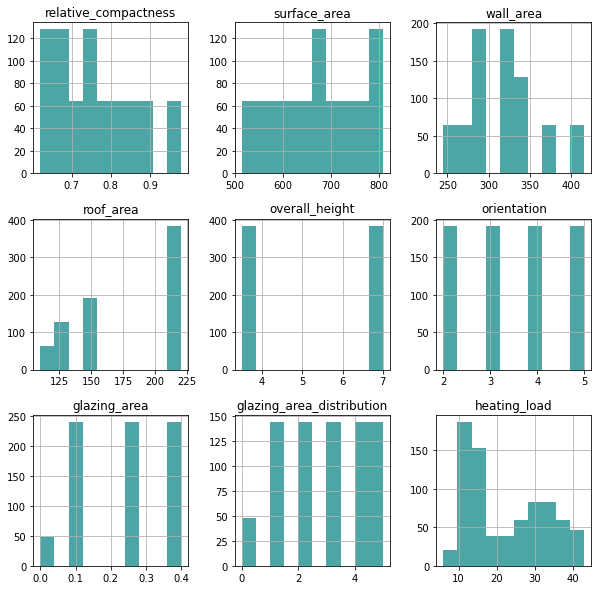

In [7]:
# Ver la distribución de las variables
data.hist(color= 'teal', alpha= 0.7, bins= 10, figsize= (10, 10))
plt.show()

A través de los histogramas, se puede observar que las variables tienen dimensiones muy distintas entre sí, por lo que será necesario escalar los datos mediante el `MinMaxScaler` para tener obtener la información dentro de un mismo rango $[0,1]$. Antes de ello, se hará un `Train-Test Split` para no tener *leakage* de datos, es decir, para separar los datos de entrenamiento respecto a los de respuesta. Además, se puede observar que los datos no están tan imbalanceados, se considerá que podrá ser más perjudical hacer un sobremuestro o submestreo que dejarlos como están.

In [8]:
# Identificar las variables predictoras y las objetivo
respuesta= ['heating_load']
predictoras= [c for c in data.columns if c not in respuesta]
print(f'Predictoras:\n {predictoras} \n\nObetivo:\n {respuesta}')

Predictoras:
 ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution'] 

Obetivo:
 ['heating_load']


In [9]:
# Dividir los datos en dos grupos; 70% de entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(data[predictoras], data[respuesta], test_size=0.3)

# Merge entre predictores y la respuesta
train= pd.merge(X_train, y_train, left_index= True, right_index= True)
test= pd.merge(X_test, y_test, left_index= True, right_index= True)
print(f'Tamaño de DataFrame original: {data.shape}')
print(f'Tamaño de X entrenamiento: {X_train.shape}')
print(f'Tamaño de X prueba:: {X_test.shape}')
print(f'Tamaño de y entrenamiento: {y_train.shape}')
print(f'Tamaño de y prueba: {y_test.shape}')
print(f'Tamaño de Train: {train.shape}')
print(f'Tamaño de Test: {test.shape}')

Tamaño de DataFrame original: (768, 9)
Tamaño de X entrenamiento: (537, 8)
Tamaño de X prueba:: (231, 8)
Tamaño de y entrenamiento: (537, 1)
Tamaño de y prueba: (231, 1)
Tamaño de Train: (537, 9)
Tamaño de Test: (231, 9)


In [10]:
# Escalar datos
scaler= preprocessing.MinMaxScaler()
d= scaler.fit_transform(X_train)
scaled_df= pd.DataFrame(d, columns= predictoras)
scaled_df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,0.666667,0.250000,0.285714,0.333333,1.0,1.000000,1.000,0.8
1,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,0.625,0.8
2,0.111111,0.833333,0.428571,1.000000,0.0,0.000000,0.250,0.2
3,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.000,0.8
4,0.333333,0.583333,0.000000,1.000000,0.0,1.000000,1.000,0.6


Observar que, después del escalamiento, la distribución no cambia.

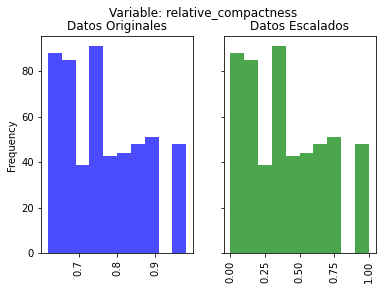

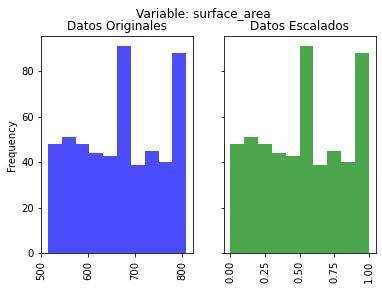

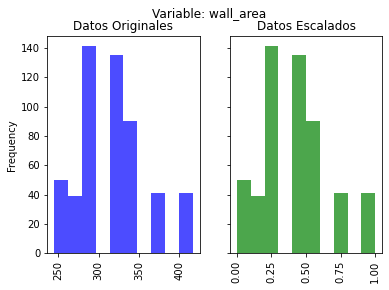

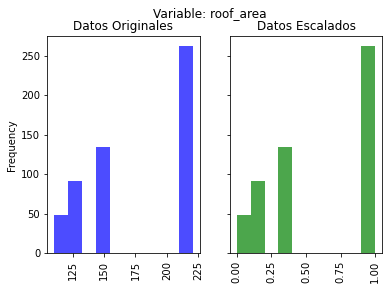

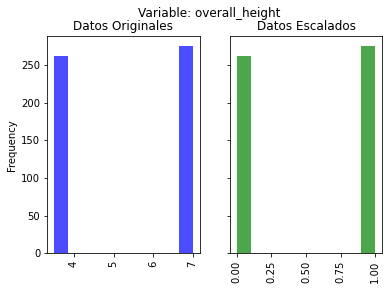

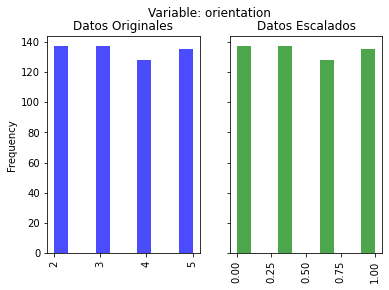

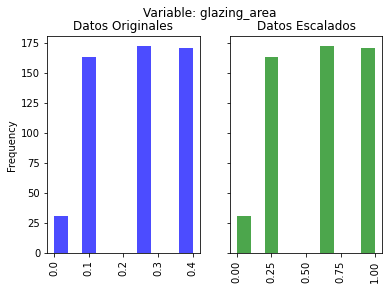

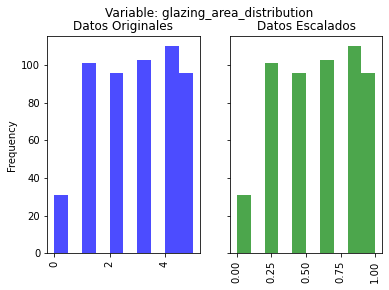

In [11]:
# Graficar variable original vs. variable escalada por minmax
for col in X_train.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey= True)
    X_train[col].plot(kind= 'hist', ax=ax[0],
                      color= 'blue',
                      alpha= 0.7,
                      title= 'Datos Originales',
                      rot=90)
    scaled_df[col].plot(kind='hist',
                        ax=ax[1],
                        color='green',
                        alpha=0.7,
                        title='Datos Escalados',
                        rot=90)
    fig.suptitle(f'Variable: {col}')

La variable $Y_1 \rightarrow \text{heating_load}$ tiene sesgo a la derecha, por lo que se hará una `log transformación`.

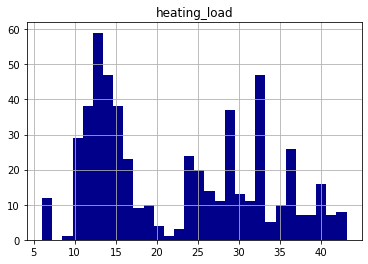

In [12]:
# Original
y_train.hist(bins= 30, color= 'darkblue')
plt.show()

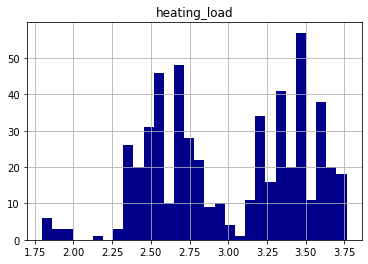

In [13]:
# Con transformación
y_log= np.log(y_train) # Obtener su logaritmo natural
y_log.hist(bins= 30, color= 'darkblue')
plt.show()

Una vez que los datos están escalados, se hará una selección de variables a través de la varianza.

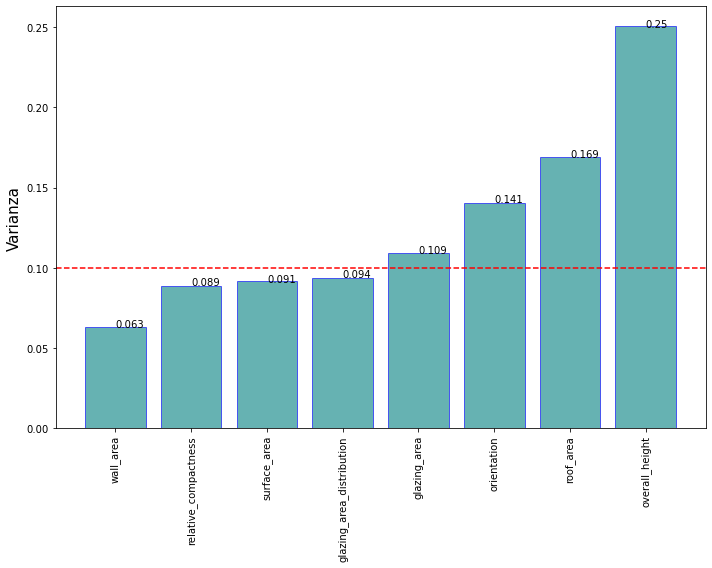

In [14]:
# Varianza por variable
varianzas= pd.DataFrame(scaled_df.var().sort_values(), columns= ['Varianza'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 3), round(y[i], 3))

fig= plt.figure(figsize= (10, 8))
plt.bar(np.arange(len(varianzas)), varianzas.Varianza, color= 'teal', alpha= 0.6, edgecolor= 'blue')
plt.ylabel('Varianza', fontsize= 15)
plt.xticks(np.arange(len(varianzas)),varianzas.index, rotation= 90)
addlabels(np.arange(len(varianzas)), varianzas.Varianza)
plt.axhline(0.1, linestyle= '--', c= 'r')
plt.tight_layout()
plt.show()

Visualizando las varianzas de cada variable en la gráfica, si se decidiera hacer una selección de campos a través de este método, considerando el límite $0.10$ entonces las variables seleccionadas serían:
1. `overall_height`
2. `roof_area`
3. `orientation`
4. `glazing_area`

Se confirmarán dichas variables utilizando otro método de selección; Lasso.

In [15]:
lasso_model= Lasso(alpha= 1, random_state= 7)
lasso_model.fit(X_train, y_log)
coefs_= abs(lasso_model.coef_)
print(f'Coeficientes: {coefs_} \nColumnas: {X_train.columns}')

Coeficientes: [0.         0.00355331 0.00541259 0.00100652 0.         0.
 0.         0.        ] 
Columnas: Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution'],
      dtype='object')


Dado que Lasso hace $0$ aquellas variables que no tienen mucha relación con las de respuesta, los *features* seleccionads a través de Lasso serían:
1. `wall_area`
2. `surface_area`
3. `roof_area`

Entre los dos, se eligirían:
+ `wall_area`
+ `surface_area`
+ `roof_area`
+ `overall_height`
+ `orientation`
+ `glazing_area`


Es decir, todas excepto `relative_compactness` y `glazing_area_distribution`. Aún así, esto se reconsiderará según los resultados del modelo de Árbol de Decisión. Se recomienda no basarse en un solo método para hacer selección de variables.

In [16]:
# Conocer la asimetría de cada variable
asimetria= round(X_train.skew(), 2)
asimetria= asimetria.to_frame()
asimetria= asimetria.rename(columns= {0: "value"}) 
def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>= -0.5) or (x['value'] >= 0 and x['value']<= 0.5):
        return 'Symmetric distribution'
    else: 
        return 'Moderately skewed'
asimetria['skewness'] = asimetria.apply(f, axis=1)
asimetria

,value,skewness
relative_compactness,0.43,Symmetric distribution
surface_area,-0.07,Symmetric distribution
wall_area,0.53,Moderately skewed
roof_area,-0.12,Symmetric distribution
overall_height,-0.05,Symmetric distribution
orientation,0.03,Symmetric distribution
glazing_area,-0.09,Symmetric distribution
glazing_area_distribution,-0.12,Symmetric distribution


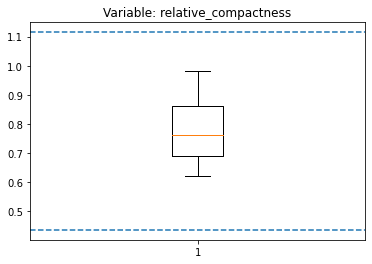

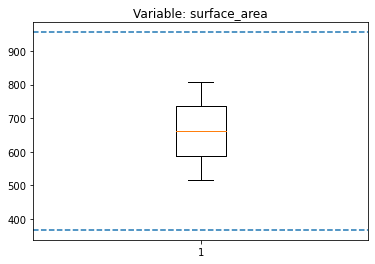

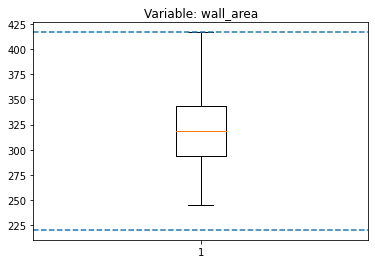

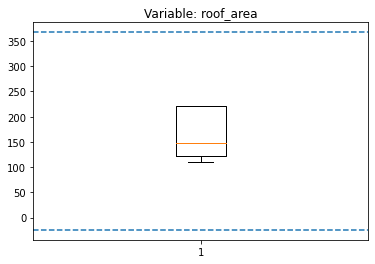

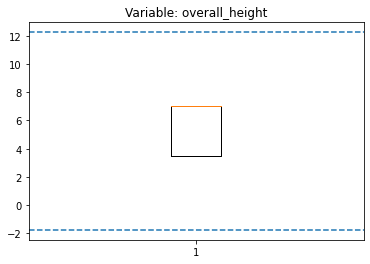

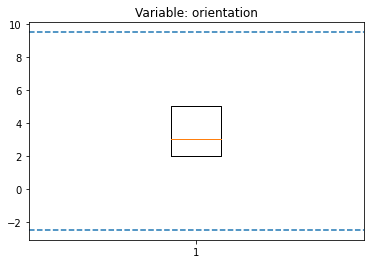

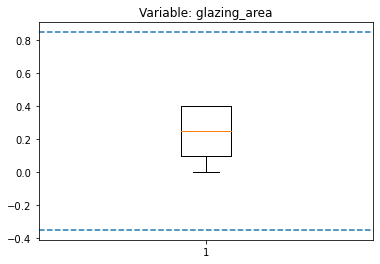

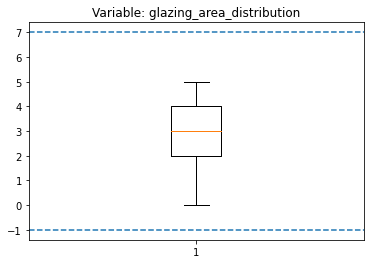

In [17]:
# Identificar valores atípicos
Q1= X_train.quantile(0.25)   # Primer cuantil
Q3= X_train.quantile(0.75)   # Tercer cuantil
iqr= Q3 - Q1            # Rango intercuártilico
lim_inferior= Q1 - (1.5*iqr)
lim_superior= Q3 + (1.5*iqr)

# Visualizar diagrama de cajas y bigotes para sospechar la presencia de outliers en el dataset
for col in X_train:
    plt.boxplot(X_train[col])    
    plt.axhline(lim_inferior[col], linestyle= '--')
    plt.axhline(lim_superior[col], linestyle= '--')
    plt.title(f'Variable: {col}')
    plt.show()

Debido a que las gráficas marcan los límites inferiores y superiores a partir de los cuales se considerarían *outliers*, se puede confirmar que no hay valores atípicos en las variables.
___

<font color= 'teal'> 3. **Procesar modelo de regresión**. </font>

Aplicar al menos $2$ modelos de regresión para estimar el mapeo de los datos. La intención principal es hacer una comparación del *performance* de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución). De ser posible añadir un método de ajuste de hiperparámetros (*gridsearch*) para mejorar el performance del modelo.

<font color= 'darkblue'> **Primer modelo:** Árbol de Decisión. </font>

In [18]:
# Utilizar cross validation y grid search
model= DecisionTreeRegressor()
gs= GridSearchCV(model,
                 param_grid= {'max_depth': range(1, 11),
                              'min_samples_split': range(10, 60, 10)},
                  cv= 5,
                  scoring= 'neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 10}


In [19]:
#crear modelo usando parámetros óptimos
new_model = DecisionTreeRegressor(max_depth= 7,
                                  min_samples_split=10)
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=10)

In [20]:
yhat= new_model.predict(X_test)
R2_score_DT= r2_score(y_test, yhat)
MSE_score_DT= mean_squared_error(y_test, yhat)
print(f'R2: {R2_score_DT} \nMSE: {MSE_score_DT}')

R2: 0.9954514343687105 
MSE: 0.48002210632551584


In [21]:
importances= new_model.feature_importances_
importances, X_train.columns

(array([1.59510646e-02, 6.76081782e-04, 9.38487160e-02, 5.78863435e-04,
        8.00254534e-01, 7.42282834e-05, 7.57364470e-02, 1.28800652e-02]),
 Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
        'overall_height', 'orientation', 'glazing_area',
        'glazing_area_distribution'],
       dtype='object'))

Se tomará este primer modelo como una verificación de la selección de variables. Debido a que `overall_height` no tiene importancia para el árbol, se descartará y se modificará la selección.

In [22]:
# Seleccionar las variables elegidas arriba
x_train= X_train[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'orientation', 'glazing_area', 
                  'glazing_area_distribution']]
x_test= X_test[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'orientation', 'glazing_area', 
                  'glazing_area_distribution']]
x_train.shape, x_test.shape

((537, 7), (231, 7))

---

<font color= 'darkblue'> **Segundo modelo:** Bosque Aleatorio. </font>

In [23]:
modelo= RandomForestRegressor(n_estimators= 100,
                              criterion= 'mse', 
                              max_depth= None,
                              min_samples_split= 2,
                              min_samples_leaf= 1,
                              max_features= 'auto', 
                              bootstrap= True,
                              oob_score= False,
                              random_state= 0,
                              verbose= 0)

In [24]:
modelo= modelo.fit(x_train, y_train) 
y_gorro= modelo.predict(x_test)
print(f'R2: {modelo.score(x_test, y_test)}')

R2: 0.9971061265340985


In [25]:
modelo= RandomForestRegressor(criterion= 'mse',
                               min_samples_leaf= 1,
                               max_features= 'auto',
                               bootstrap= True,
                               oob_score= False,
                               random_state= 0,
                               verbose= 0)
gs= GridSearchCV(modelo,
                 param_grid= {'max_depth': range(1, 11),
                              'min_samples_split': range(10, 60, 10),
                              'n_estimators': range(1, 100, 10)}, 
                  cv= 2,
                  scoring= 'neg_mean_squared_error')
gs.fit(x_train, y_train)
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 81}


In [26]:
nuevo_modelo= RandomForestRegressor(n_estimators= 81,
                                    criterion= 'mse',
                                    max_depth= 10,
                                    min_samples_split= 10,
                                    min_samples_leaf= 1,
                                    max_features= 'auto',
                                    bootstrap= True,
                                    oob_score= False,
                                    random_state= 0,
                                    verbose= 0)
nuevo_modelo.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=81,
                      random_state=0)

In [27]:
y_gorro= nuevo_modelo.predict(x_test)
R2_score_RF= r2_score(y_test, y_gorro)
MSE_score_RF= mean_squared_error(y_test, y_gorro)
print(f'R2: {R2_score_RF} \nMSE: {MSE_score_RF}')

R2: 0.9958102062568225 
MSE: 0.4421599644148431


El modelo de árboles puede que esté sobreajustando, por lo que se revisará si utilizando otras particiones de *test-train* sucede el mismo fenómeno, o sólo pasa con esa partición.

In [28]:
new_X_train, new_X_test, new_y_train, new_y_test= train_test_split(data[predictoras], data[respuesta], 
                                                                   test_size= 0.2, random_state= 6)

In [29]:
x_train.head(1)

,relative_compactness,surface_area,wall_area,roof_area,orientation,glazing_area,glazing_area_distribution
683,0.86,588.0,294.0,147.0,5,0.4,4


In [30]:
new_X_train.head(1)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
203,0.86,588.0,294.0,147.0,7.0,5,0.1,4


In [31]:
modelo= RandomForestRegressor(n_estimators= 100,
                              criterion= 'mse', 
                              max_depth= None,
                              min_samples_split= 2,
                              min_samples_leaf= 1,
                              max_features= 'auto', 
                              bootstrap= True,
                              oob_score= False,
                              random_state= 0,
                              verbose= 0)
modelo= modelo.fit(new_X_train, new_y_train) 
y_gorro= modelo.predict(new_X_test)
print(f'R2: {modelo.score(new_X_test, new_y_test)}')

R2: 0.9976145421999499


In [32]:
modelo= RandomForestRegressor(criterion= 'mse',
                               min_samples_leaf= 1,
                               max_features= 'auto',
                               bootstrap= True,
                               oob_score= False,
                               random_state= 0,
                               verbose= 0)
gs= GridSearchCV(modelo,
                 param_grid= {'max_depth': range(1, 11),
                              'min_samples_split': range(10, 60, 10),
                              'n_estimators': range(1, 100, 10)}, 
                  cv= 2,
                  scoring= 'neg_mean_squared_error')
gs.fit(new_X_train, new_y_train)
print(gs.best_params_)

{'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 91}


In [33]:
nuevo_modelo= RandomForestRegressor(n_estimators= 91,
                                    criterion= 'mse',
                                    max_depth= 8,
                                    min_samples_split= 10,
                                    min_samples_leaf= 1,
                                    max_features= 'auto',
                                    bootstrap= True,
                                    oob_score= False,
                                    random_state= 0,
                                    verbose= 0)
nuevo_modelo.fit(new_X_train, new_y_train)

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=91,
                      random_state=0)

In [34]:
y_gorro= nuevo_modelo.predict(new_X_test)
R2_score_RF= r2_score(new_y_test, y_gorro)
MSE_score_RF= mean_squared_error(new_y_test, y_gorro)
print(f'R2: {R2_score_RF} \nMSE: {MSE_score_RF}')

R2: 0.9956015292826809 
MSE: 0.4464943517406011


---

<font color= 'darkblue'> **Tercer modelo:** Máquina de Soporte Vectorial basada en Regresión. </font>

In [35]:
epsilon= 0.1
model_svr= SVR(kernel='rbf', epsilon= epsilon)
model_svr.fit(x_train, y_train)
y_pred= model_svr.predict(x_test)
print('R2 = %0.4f'%model_svr.score(x_test, y_test))
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R2 = 0.6889
MSE: 32.8319373930526


In [36]:
#Usando cross validation y grid search
tuned_parameters= [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
model= SVR()
gs= GridSearchCV(model,
                 tuned_parameters, 
                 cv= 2,
                 scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)
print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [37]:
new_model= SVR(kernel= 'rbf', C= 1000, gamma= 0.001)
new_model.fit(x_train, y_train)

SVR(C=1000, gamma=0.001)

In [38]:
y_gorro= new_model.predict(x_test)
R2_score_SVR= r2_score(y_test, y_gorro)
MSE_score_SVR= mean_squared_error(y_test, y_gorro)
print(f'R2: {R2_score_SVR} \nMSE: {MSE_score_SVR}')

R2: 0.9649786146860747 
MSE: 3.695898994879869


<font color= 'teal'> 4. **Discusión de los resultados**. </font>

Basado en los resultados de la comparación y *performance* de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos.

In [39]:
comparar_reg= {'Modelo': ['Decision_Tree', 'Random_Forest', 'SVR'],
               'R2_Score': [R2_score_DT, R2_score_RF, R2_score_SVR],
               'MSE': [MSE_score_DT, MSE_score_RF, MSE_score_SVR]}
comparar_reg= pd.DataFrame(comparar_reg)
comparar_reg

,Modelo,R2_Score,MSE
0,Decision_Tree,0.995451,0.480022
1,Random_Forest,0.995602,0.446494
2,SVR,0.964979,3.695899


Los tres modelos tuvieron resultados bastantes buenos. Se busca que el valor de $R^2$ sea cercano a $1$ y que el $MSE$ (Error Cuadrático Medio, o Mean Squared Error en inglés) sea cercano a $0$.

El árbol de decisión por sí solo tiene cierta iestabilidad del modelo debido a que las particiones se basan en un conjunto de datos, y si se generaran cambios en el conjunto de datos entonces habría cambios importantes en la estructura del árbol y, especialmente, en su interpretabilidad. Por ello, el bosque aleatorio es muy buenos generalizando y, al ser un algoritmo muy estable, cuando hay datos nuevos, el algoritmo no se ve muy afectado. En caso de la máquina de vector soporte basada en regresión, tiene los beneficios de ser más efectivo para espacios de alta multidimensional y en casos cuando el número de variables es mayor al número de filas. Además, es un modelo robusto ante datos atípicos y tiene fácil implementación. En caso de tener grandes *datasets* puede llevar largos periodos de entrenamiento, especialmente para optimización de hiperparámetros. No obstante, una vez entrenado el modelo la predicción es muy rápida.

Desde entendido, dado que las métricas son bastantes parecidas, basándose más en las ventajas y desventajas se elegiría la máquina de vector soporte para la predicción de nuevos datos. Además, de esta manera se aseguraría evitar el sobreajuste de los otros modelos. 
___

### <font color= 'blue'> Clasificación </font> 
<font color= 'teal'> 1. **Definición del problema**. </font>

Este problema tiene un sistema de aprendizaje obtenido con ejemplos de posiciones de ajedrez descritas únicamente por las coordinadas de las piezas en el tablero. También se toma en cuenta conocimiento básico sobre las diferencias de la forma entre filas y columnas. Las relaciones necesarias para formar un clasificador correcto para la variable objetivo debe ser descubierta por el sistema de aprendizaje.

La tarea consiste en clasificar las posiciones ganadas para las blancas en un número fijo de jugadas, asumiendo un juego óptimo de ambos lados. El problema se estructura en subproblemas separados por sorteo ordenado de profundidad de ganancia; $cero$, $uno$, $dos$, y así sucesivamente hasta el $dieciséis$. Los datos se obtuvieron de [archive.ics.uci.edu](http://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29)

**Variables:**
+ a $\rightarrow$ White King file
+ 1 $\rightarrow$ White King rank
+ b $\rightarrow$ White Rook file
+ 3 $\rightarrow$ White Rook rank
+ c $\rightarrow$ Black King file
+ 2 $\rightarrow$ Black King rank
+ draw $\rightarrow$ optimal depth-of-win for White in $0$ to 16 moves, otherwise drawn
> Donde:
> * file $\rightarrow$ columna
> * rank $\rightarrow$ fila

Igual que en el caso anterior, para poder visualizar los datos a través del código posterior, se necesita tener el archivo tipo `data` adjunto en el mismo entorno virtual que este *Jupyter Notebook*, en caso contrario será necesario especificar la dirección en donde se encuentra dicho documento. También se pueden obtener los datos directamente desde la página mencionada ([archive.ics.uci.edu](http://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29))

<font color= 'teal'> 2. **Preparación de datos:** </font> <br>

In [40]:
# Importar datos
df= pd.read_csv('Chess.data')
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [41]:
# Renombrar las columnas
nombres2= ['white_king_file', 'white_king_rank', 'white_rook_file',
           'white_rook_rank', 'black_king_file', 'black_king_rank', 'y']
df.columns= nombres2
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,y
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [42]:
# Conocer los datos
# Se guardan los datos como un DataFrame de pandas
print(f'+ Tipo: \n {type(df)}')

# El tamaño de los datos se visualiza en una tupla; primero la cantidad de filas y después el número de columnas
print(f'\n+ Dimensión de los datos: \n {df.shape}')

# Tipo de cada variable
print(f'\n+ Tipo de datos por columna: \n{df.dtypes}')

# Conteo de valores nulos
print(f'\n+ Cantidad de nulos por columna: \n{df.isnull().sum()}')

# Valores únicos
print(f'\n+ Valores únicos por columna: \n{df.nunique()}')

+ Tipo: 
 <class 'pandas.core.frame.DataFrame'>

+ Dimensión de los datos: 
 (28055, 7)

+ Tipo de datos por columna: 
white_king_file    object
white_king_rank     int64
white_rook_file    object
white_rook_rank     int64
black_king_file    object
black_king_rank     int64
y                  object
dtype: object

+ Cantidad de nulos por columna: 
white_king_file    0
white_king_rank    0
white_rook_file    0
white_rook_rank    0
black_king_file    0
black_king_rank    0
y                  0
dtype: int64

+ Valores únicos por columna: 
white_king_file     4
white_king_rank     4
white_rook_file     8
white_rook_rank     8
black_king_file     8
black_king_rank     8
y                  18
dtype: int64


In [43]:
# Resumen de lo anterior
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28055 entries, 0 to 28054
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white_king_file  28055 non-null  object
 1   white_king_rank  28055 non-null  int64 
 2   white_rook_file  28055 non-null  object
 3   white_rook_rank  28055 non-null  int64 
 4   black_king_file  28055 non-null  object
 5   black_king_rank  28055 non-null  int64 
 6   y                28055 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Para poder trabajar con los datos, es necesario convertir las variables categóricas a numéricas.

In [44]:
# Visualizar las columnas categóricas (de tipo objeto)
for col in df.columns:
    if df[col].dtype== 'object':
        print(f'- {col}')

- white_king_file
- white_rook_file
- black_king_file
- y


In [45]:
print(f'Valores únicos "white_king_file": {df["white_king_file"].unique()}')
print(f'\nValores únicos "white_rook_file": {df["white_rook_file"].unique()}')
print(f'\nValores únicos "black_king_file": {df["black_king_file"].unique()}')
print(f'\nValores únicos "y": {df["y"].unique()}')

Valores únicos "white_king_file": ['a' 'b' 'c' 'd']

Valores únicos "white_rook_file": ['c' 'd' 'e' 'f' 'g' 'h' 'a' 'b']

Valores únicos "black_king_file": ['c' 'd' 'e' 'f' 'g' 'h' 'a' 'b']

Valores únicos "y": ['draw' 'zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'ten' 'eleven' 'twelve' 'thirteen' 'fourteen' 'fifteen' 'sixteen']


In [46]:
# Convertir a numéricas con LabelEncoder 
df3= df.copy()
lbl_white_king= LabelEncoder()
df3['white_king_file']= lbl_white_king.fit_transform(df3['white_king_file'])
lbl_white_rook= LabelEncoder()
df3['white_rook_file']= lbl_white_rook.fit_transform(df3['white_rook_file'])
lbl_black_king= LabelEncoder()
df3['black_king_file']= lbl_black_king.fit_transform(df3['black_king_file'])
lbl_result= LabelEncoder()
df3['y']= lbl_result.fit_transform(df3['y'])
df3.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,y
0,0,1,2,1,2,2,0
1,0,1,2,1,3,1,0
2,0,1,2,1,3,2,0
3,0,1,2,2,2,1,0
4,0,1,2,2,2,3,0


In [47]:
# Guardar en el DataFrame original
df= df3.copy()

In [48]:
# Verificar que sean numéricas
print(f'\n+ Tipo de datos por columna: \n{df.dtypes}')


+ Tipo de datos por columna: 
white_king_file    int32
white_king_rank    int64
white_rook_file    int32
white_rook_rank    int64
black_king_file    int32
black_king_rank    int64
y                  int32
dtype: object


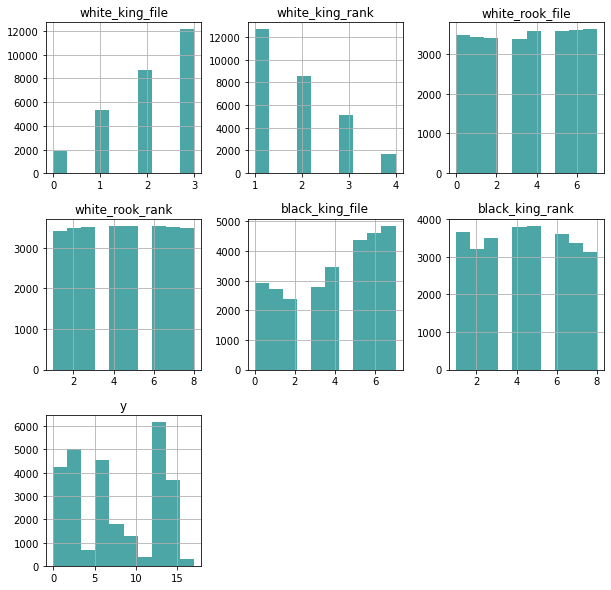

In [49]:
# Ver la distribución de las variables
df.hist(color='teal', alpha= 0.7, bins=10, figsize=(10,10))
plt.show()

En este caso, no será necesario escalar las variables ya que todas se encuentran en un rango similar. El procedimiento de *train-test* sí se realizará.

In [50]:
# Identificar las variables predictoras y las objetivo
objetivo= ['y']
predictores= [c for c in df.columns if c not in objetivo]
print(f'Predictoras:\n {predictores} \n\nObetivo:\n {objetivo}')

#Separar x de y
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

Predictoras:
 ['white_king_file', 'white_king_rank', 'white_rook_file', 'white_rook_rank', 'black_king_file', 'black_king_rank'] 

Obetivo:
 ['y']


In [51]:
# Dividir los datos en dos grupos para evitar leakage; 70% de entrenamiento y 30% para prueba
train_X, test_X, train_y, test_y= train_test_split(x, y, test_size= 0.3)

print(f'Tamaño de DataFrame original: {df.shape}')
print(f'Tamaño de X entrenamiento: {train_X.shape}')
print(f'Tamaño de X prueba:: {test_X.shape}')
print(f'Tamaño de y entrenamiento: {train_y.shape}')
print(f'Tamaño de y prueba: {test_y.shape}')

Tamaño de DataFrame original: (28055, 7)
Tamaño de X entrenamiento: (19638, 6)
Tamaño de X prueba:: (8417, 6)
Tamaño de y entrenamiento: (19638,)
Tamaño de y prueba: (8417,)


In [52]:
#Distribución de la variable Y 
df.y.value_counts()

6     4553
13    4194
15    3597
2     2854
0     2795
3     2166
12    1985
7     1712
1     1433
9      683
10     592
4      471
11     390
16     246
5      198
14      81
8       78
17      27
Name: y, dtype: int64

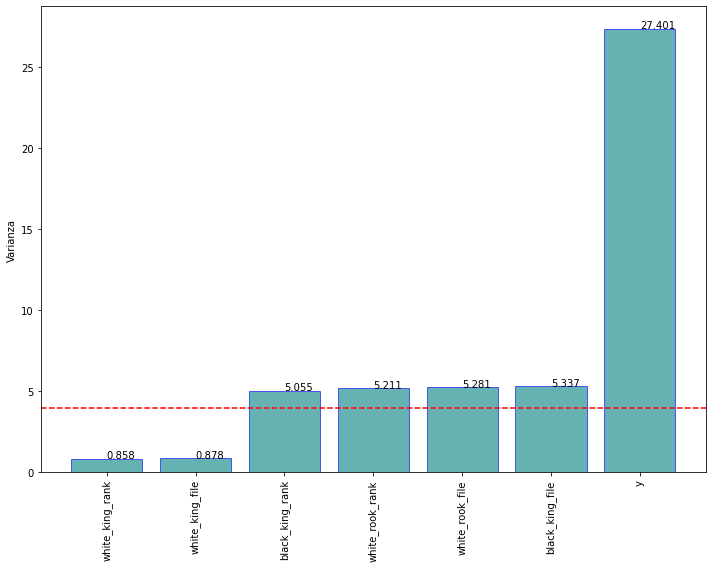

In [53]:
# Varianzas de cada columna
varianzas= pd.DataFrame(df.var().sort_values(), columns= ['Varianza'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 3), round(y[i], 3))

fig= plt.figure(figsize= (10, 8))
plt.bar(np.arange(len(varianzas)), varianzas.Varianza, color= 'teal', alpha= 0.6, edgecolor= 'blue')
plt.ylabel('Varianza')
plt.xticks(np.arange(len(varianzas)),varianzas.index, rotation= 90)
addlabels(np.arange(len(varianzas)), varianzas.Varianza)
plt.axhline(4, linestyle= '--', c= 'r')
plt.tight_layout()
plt.show()

Visualizando las varianzas de cada variable en la gráfica, si se decidiera hacer una selección de campos a través de este método, considerando un límite mayor a $4$, entonces las variables seleccionadas serían:
1. `black_king_file`
2. `white_rook_file`
3. `white_rook_rank`
4. `black_king_rank`

In [54]:
# Conocer la asimetría
df_train = pd.DataFrame(train_X)
asimetria= round(df_train.skew(), 2)
asimetria= asimetria.to_frame()
asimetria= asimetria.rename(columns= {0: "value"}) 
def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>= -0.5) or (x['value'] >= 0 and x['value']<= 0.5):
        return 'Symmetric distribution'
    else: 
        return 'Moderately skewed'
asimetria['skewness'] = asimetria.apply(f, axis=1)
asimetria

,value,skewness
0,-0.69,Moderately skewed
1,0.76,Moderately skewed
2,-0.03,Symmetric distribution
3,-0.01,Symmetric distribution
4,-0.36,Symmetric distribution
5,0.00,Symmetric distribution


In [55]:
# Balancear los datos
smote= SMOTE()
x_smote, y_smote= smote.fit_resample(train_X, train_y)

___
<font color= 'teal'> 3. **Procesar modelo de clasificación**. </font>

Aplicar al menos 2 modelos de clasificación para estimar el mapeo de los datos. La intención principal es hacer una comparación del *performance* de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución). De ser posible añadir un método de ajuste de hiperparámetros (*gridsearch*) para mejorar el performance del modelo.

<font color= 'darkblue'> **Primer modelo:** Regresión Logística. </font>

In [56]:
logreg= LogisticRegression()
logreg.fit(x_smote, y_smote)

LogisticRegression()

In [57]:
y_pred= logreg.predict(test_X)

In [58]:
confusion_matrix= confusion_matrix(test_y, y_pred)
print(confusion_matrix)

[[ 74   2  56  93  22  10 158  56   5  80  45  74  57  49  10  37   3  11]
 [  7 125  27  11  31   3  32  33   3  22  61   7   8  14  23   0  12   4]
 [ 42  16 142  51  20   1  83 210  11  35  19  57  33 101   0  17   2   1]
 [ 20   0   1 236   3   0 228   4   0   2  15 152  14   2   0   1   0   0]
 [  0   7   5   1  41  29   0   0   3   5  21   0   1   0  23   0   6   0]
 [  0   0   0   0  19  25   0   0   0   0  10   0   0   0   6   0   2   0]
 [121  11  36 244  17   0 578  41   3  29  53 119  49  31   0  21   0   2]
 [ 18  87  62  30   9   3  30 115   9  19  42   4  20  28   9   7   6   4]
 [  0   0   0   0   2   0   0   0   9   0   0   0   0   0   2   0   4   1]
 [  2  47  10   7  19   4  10  12   7  14  25   4   5   4   4   1   2   5]
 [  0  18   7   4  40   3   0   5   0  11  80   0   2   4   8   0   1   3]
 [  0   0   0  27   0   0   0   0   0   0   0  88   0   0   0   0   0   0]
 [ 17  71  77  36  20   3  51 114  19  43  32  22  30  30   0   9   8   4]
 [118  22 113 148  10   0

In [59]:
print('Accuracy: {:.4f}'.format(logreg.score(test_X, test_y)))

Accuracy: 0.2144


In [60]:
cv= KFold(n_splits=10, random_state= 1, shuffle=True)
model = LogisticRegression()
scores= cross_val_score(model, train_X, train_y, scoring= 'accuracy', cv= cv)
accuracy_LR= np.mean(scores)
print('Accuracy: %.4f' % (accuracy_LR))

Accuracy: 0.2711


___

<font color= 'darkblue'> **Segundo modelo:** Árbol de Decisión. </font>

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model= DecisionTreeClassifier()
model.fit(x_smote, y_smote)
y_predict= model.predict(test_X)
confusion= confusion_matrix(test_y, y_predict)
print(confusion)

[[ 594   15   23   30    3    9   38   15    4   13    9   15   31   16
     1   19    1    6]
 [   4  337    2    0    3    0    0   29    0   36    5    0    4    2
     0    1    0    0]
 [  19   10  668    1    0    0    4   22    0    3    2    0   48   18
     0   46    0    0]
 [  22    0    0  551    0    0   75    0    0    1    0   12    0   12
     0    5    0    0]
 [   5    3    0    0  113    7    0    1    0    3    9    0    0    0
     1    0    0    0]
 [   4    1    0    0    7   46    0    0    0    1    1    0    0    0
     2    0    0    0]
 [  25    1    7   76    0    0 1119    0    0    0    1    2    5   86
     0   33    0    0]
 [  10   47    8    0    0    0    2  396    0    8    0    0   27    1
     0    3    0    0]
 [   0    0    0    0    0    0    0    0   17    1    0    0    0    0
     0    0    0    0]
 [   6    6    0    0    1    1    0    4    0  147   13    0    4    0
     0    0    0    0]
 [   6    7    0    0   10    1    0    6    0   2

In [62]:
score_DT= model.score(test_X, test_y)
print(score_DT)

0.7848402043483427


<font color= 'darkblue'> **Tercer modelo:** Bosque Aleatorio. </font>

In [63]:
modelo= RandomForestClassifier(n_estimators= 100,
                               criterion= 'gini',
                               max_depth= 3,
                               min_samples_split= 2,
                               min_samples_leaf= 1,
                               max_features= 'auto',
                               bootstrap= True,
                               oob_score= False,
                               random_state= 0,
                               verbose= 1)

modelo= modelo.fit(x_smote, y_smote)
y_gorro= modelo.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
accuracy= accuracy_score(test_y, y_gorro)
precison= precision_score(test_y, y_gorro, average= 'weighted')
recall= recall_score(test_y, y_gorro, average= 'weighted')
print(f'Accuracy: {accuracy} \nPrecision: {precison} \nRecall: {recall}')

Accuracy: 0.2787216347867411 
Precision: 0.28746631418323265 
Recall: 0.2787216347867411


In [65]:
model= RandomForestClassifier(criterion= 'gini',
                              min_samples_leaf= 2,
                              max_features= 'auto',
                              bootstrap= True,
                              oob_score= False,
                              random_state= 0,
                              verbose= 0)
gs= GridSearchCV(model,
                param_grid= {'max_depth': range(5, 20,5),
                             'min_samples_split': range(1, 10, 2),
                             'n_estimators': range(15, 50, 5)}, 
                  cv= 10,
                  scoring= 'accuracy')
gs.fit(x_smote, y_smote)
print(gs.best_params_)

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 45}


In [66]:
new_model= RandomForestClassifier(n_estimators= 45,
                                  criterion= 'gini',
                                  max_depth= 15,
                                  min_samples_split= 3,
                                  min_samples_leaf= 2,
                                  max_features= 'auto',
                                  bootstrap= True,
                                  oob_score= False,
                                  random_state= 0,
                                  verbose= 0)
new_model.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=45, random_state=0)

In [67]:
Yhat = new_model.predict(test_X)

In [68]:
accuracy= accuracy_score(test_y, Yhat)
precison= precision_score(test_y, np.round(Yhat), average= 'weighted')
recall= recall_score(test_y, Yhat, average= 'weighted')
print(f'Accuracy: {accuracy} \nPrecision: {precison} \nRecall: {recall}')

Accuracy: 0.7587026256385886 
Precision: 0.764817227484066 
Recall: 0.7587026256385886


---

<font color= 'teal'> 4. **Discusión de los resultados**. </font>

Basado en los resultados de la comparación y *performance* de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos.

In [69]:
comparar_cla= {'Modelo': ['Logistic_Reg', 'Decision_Tree', 'Random_Forest'],
               'Accuracy': [accuracy_LR, score_DT, accuracy]}
comparar_cla= pd.DataFrame(comparar_cla)
comparar_cla

,Modelo,Accuracy
0,Logistic_Reg,0.271108
1,Decision_Tree,0.784840
2,Random_Forest,0.758703


Para medir el desempeño de los modelos se utilizó la métrica del *accuracy*, la cual representa la cantidad de observaciones predecidas correctamente por el modelo sobre el número total de observaciones. Dado que dicha métrica se busca maximizar, queda claro que el mejor modelo fue la x, seguido por x y finalmente la regresión logística.

Debido a que la regresión logística no suele tener buenos resultados cuando se trabaja con relaciones de datos complejos, como es el caso de este conjunto de datos, se comprende el porqué de los malos resultados. Sin embargo, para modelar en primera instancia a los datos, es un proceso sencillo, rápido e interpretable.

El árbol de decisión tuvo un buen desempeño pero tiene las desventajas de ser inestable debido a que las particiones se basan en un conjunto de datos y si se generaran cambios en dicho *dataset*, se producirían cambios importantes en la estructura del árbol y especialmente en su interpretabilidad. Además, tiene un rendimiento predictivo subóptimo ya que, generalmente, el modelo no converge al óptimo global.

En cuanto al bosque aleatorio, es muy bueno generalizando y además se protege del sobreajuste debido a la construcción del *bootstrapping*. También, por ser un algoritmo muy estable, cuando hay datos nuevos no se ve muy afectado. No obstante, este modelo es mucho más complejo ya que crea muchos árboles de decisión y combina sus resultados obtenidos, por lo que requiere mucho poder computacional y un periodo largo de entrenamiento.
___

## <font color= 'darkblue'> Conclusión </font>

A través del trabajo, se realizaron tres modelos distintos para cada problema; el de regresión y el de clasificación. En primer lugar, para el de regresión, los modelos generados tuvieron muy buenos resultados y no tardaron mucho tiempo en entrenarse. Incluso se comprobó si el modelo de bosque aleatorio se había sobreajustado por la métrica de $R^2$ que se obtuvo. Si bien se eligió el *mejor* modelo, eso puede ser subjetivo. Para seleccionar cuál modelo convendría más utilizar, se debería analizar específicamente lo que se busca lograr con dicho modelo y las restricciones que esto conlleva, ya que cada uno tiene sus ventajas y desventajas que afectan, tanto positiva como negativamente, su uso posterior.

En segundo lugar, para el caso de clasificación, dos modelos basados en árboles tuvieron resultados aceptables y uno, la regresión logística, no se recomienda utilizar por su pésima métrica de *accuracy*. Tanto el árbol de decisión como el bosque aleatorio, a pesar de haber obtenido un desempeño alto, se podría mejorar. Por ello, para este tipo de problema se recomendaría fuertemente generar modelos distintos, como una `red neuronal` o un modelo `XGBoost`. No obstante, es una buena base para predicciones en el contexto del problema. 

Fue muy importante analizar cada conjunto de datos porque en la Ciencia de Datos no hay un instructivo el cual se deba seguir al pie de la letra, sino que se deben ir tomando decisiones que dependen de la materia prima con la que se trabaje. Conocer, por ejemplo, si los datos se deben escalar, si hay que rellenas nulos, si existen valores atípicos, si están imbalanceados, etc. se vuelve indispensable. Además, también es relevante conocer los requisitos de los modelos para saber si se ven afectados por los aspectos mencionados anteriormente, ya que esto puede modificar gravemente los resultados.

Como se mencionó anteriormente, en un futuro se podrían seguir probando otros modelos para estos conjuntos de datos, e incluso incrementar el rango en la optimización de hiperparámetros para encontrar mejores resultados. También se podría utilizar como base este trabajo para otros conjuntos de datos tanto de regresión como de clasificación. En caso del aprendizaje no supervisado, será necesario crear modelos distintos, como el `K-Means` o el `Clustering Jerárquico`, ya que los problemas resueltos en este reporte pertenecen al aprendizaje supervisado y no se trabaja de la misma manera.

De forma general, se considera que se cumplió el objetivo del trabajo, el cual era crear modelos para los problemas y comparar su desempeño. Fue enriquecedor analizar los resultados de los modelos realizados y notar las grandes diferencias que se presentan a pesar de trabajar con la misma información y bases de datos -relativamente- pequeñas.